In [1]:
import pandas as pd
import numpy as np
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
highest_test_score = -float("inf")
temp = -float("inf")
#Load the dataset
from sklearn.datasets import load_boston
data = load_boston()
X = data.data
y = data.target

<h4>Split the range of target values into three equal parts - low, mid, and high</h4>

In [2]:
r4, r3, r2, r1 = np.percentile(y, [100, 66.66, 33.33, 0])

In [3]:
r4, r3, r2, r1

(50.0, 23.7, 18.83165, 5.0)

In [4]:
#low, mid, and high range 
print(f"Low range is from {r1} to {r2}")
print(f"Medium range is from {r2} to {r3}")
print(f"High range is from {r3} to {r4}")

Low range is from 5.0 to 18.83165
Medium range is from 18.83165 to 23.7
High range is from 23.7 to 50.0


<h4>Reassign the target values into into three categorical values 0, 1, and 2, representing low, mid and high range of values, respectively.</h4>


In [5]:
y[y < r2] = 0
y[(r2 <= y) & (y <= r3)] = 1
y[y > r3] = 2

In [6]:
y.astype(int)

array([2, 1, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2,

<h4> Split the dataset into 70% training set and 30% test set.</h4>

In [7]:
#splitting the dataset into 70% training set and 30% test set.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


<h4>Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can
be used to generate predictions for your data.</h4>

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train,Y_train)
Y_predicted = clf.predict(X_test)

<h4>Report the tree depth, number of leaves, feature importance, train score, and test score
of the tree. Let the tree depth be Td.</h4>

In [9]:
Td = clf.tree_.max_depth
number_of_leaves = clf.get_n_leaves()
print(f"Tree Depth is {Td}")
print(f"Number of leaves in the tree {number_of_leaves}")

Tree Depth is 11
Number of leaves in the tree 55


In [10]:
feature_importance = clf.feature_importances_
indices = np.argsort(feature_importance)[::-1]

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importance[indices[f]]))

1. feature 12 (0.349244)
2. feature 5 (0.268180)
3. feature 4 (0.097212)
4. feature 6 (0.063209)
5. feature 7 (0.047840)
6. feature 11 (0.042979)
7. feature 10 (0.031918)
8. feature 8 (0.031441)
9. feature 0 (0.026900)
10. feature 2 (0.023661)
11. feature 9 (0.012032)
12. feature 3 (0.005384)
13. feature 1 (0.000000)


In [11]:
train_score = clf.score(X_train,Y_train)
test_score = clf.score(X_test,Y_test)
print(f"Train Score is {train_score}")
print(f"Test Score is {test_score}")

Train Score is 1.0
Test Score is 0.6842105263157895


<h4>Show the visual output of the decision tree</h4>


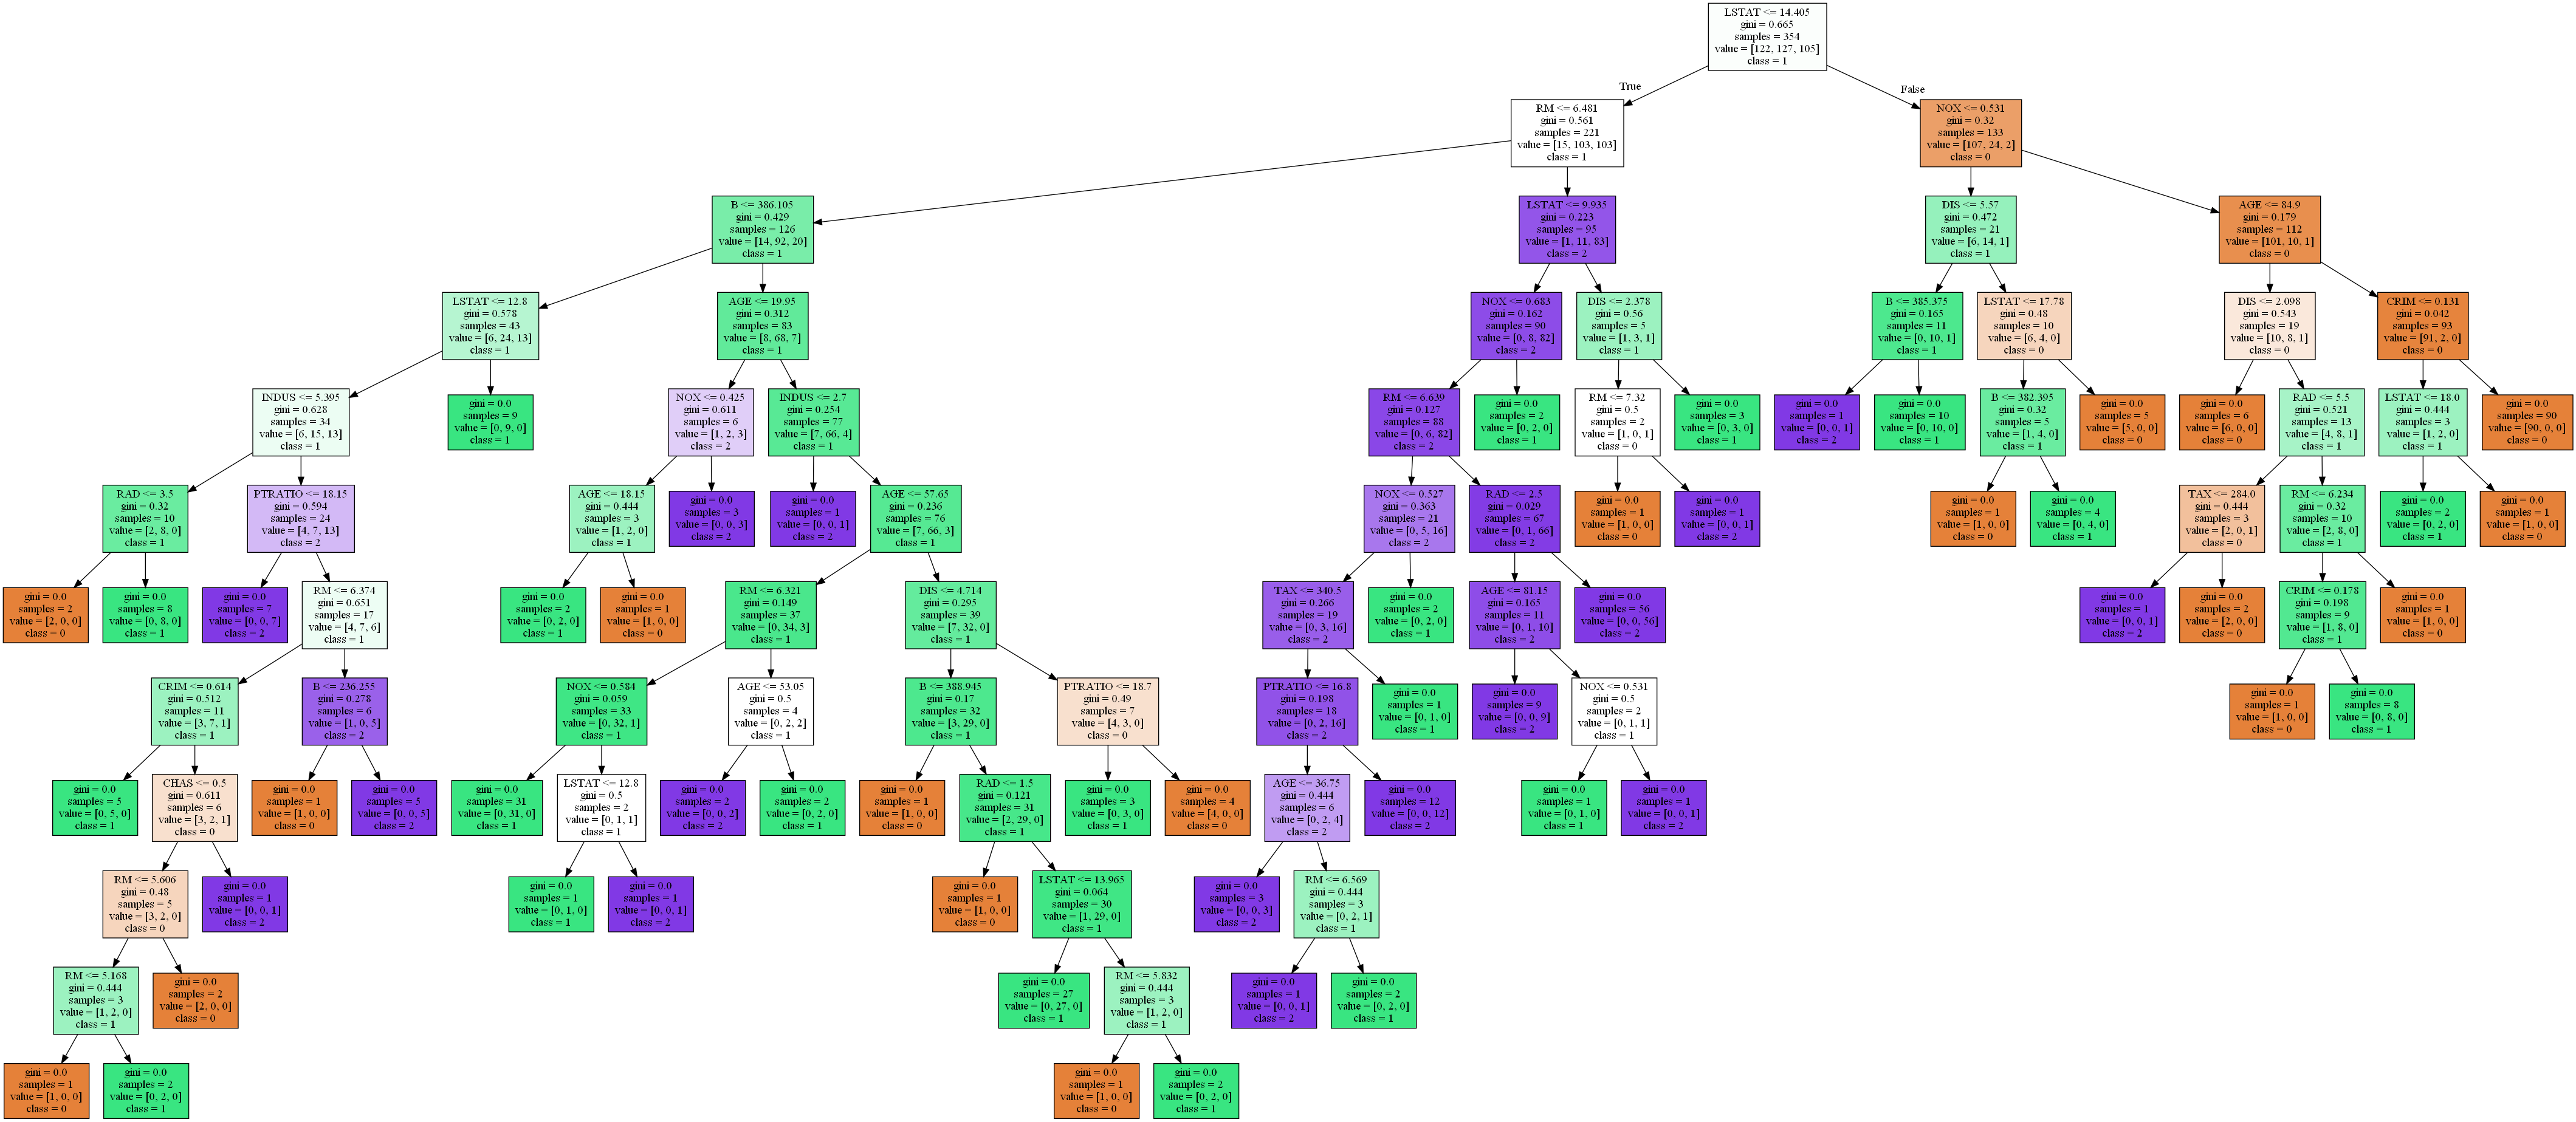

In [12]:
from sklearn import tree
import graphviz
data_for_graph = tree.export_graphviz(clf, filled= True, 
                                feature_names=data.feature_names,  
                                class_names=["0","1","2"])
visual = graphviz.Source(data_for_graph) 
visual.format = "png"
visual.render("decision_tree")
from IPython.display import Image 
Image("decision_tree.png")

<h4>Next, Generate (Td-1) decision trees on the same training set using fixed tree depths
{1, 2, ...(T d − 1)}. The tree depth can be set using max=d, where d is the depth of the
tree.</h4>
<h4>For each of the (Td-1) trees report, tree depth, number of leaves, feature importance,
train score, and test score of the tree.</h4>

In [13]:
temp_list = []
def trees_report(depth):
    global highest_test_score
    global temp
    print("*****************************************************")
    clf = DecisionTreeClassifier(random_state=1,max_depth=depth)
    clf = clf.fit(X_train,Y_train)
    Y_predicted = clf.predict(X_test)
    # depth and number of leaves
    #Td = clf.tree_.max_depth
    number_of_leaves = clf.get_n_leaves()
    print("")
    print(f"Tree Depth is {depth}")
    print(f"Number of leaves in the tree {number_of_leaves}")
    print("")
    #feature importance's listed
    feature_importance = clf.feature_importances_
    indices = np.argsort(feature_importance)[::-1]
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importance[indices[f]]))
    # Train and Test Score
    train_score = clf.score(X_train,Y_train)
    test_score = clf.score(X_test,Y_test)
    print("")
    print(f"Train Score is {train_score}")
    print(f"Test Score is {test_score}")
    print("") 
    temp_list.append(test_score)
    if test_score > temp:
        temp = test_score
        highest_test_score = depth    
    print("max test score until now")   
    print(max(temp_list))

In [14]:
for n in range(1, Td):
    trees_report(n)

*****************************************************

Tree Depth is 1
Number of leaves in the tree 2

1. feature 12 (1.000000)
2. feature 11 (0.000000)
3. feature 10 (0.000000)
4. feature 9 (0.000000)
5. feature 8 (0.000000)
6. feature 7 (0.000000)
7. feature 6 (0.000000)
8. feature 5 (0.000000)
9. feature 4 (0.000000)
10. feature 3 (0.000000)
11. feature 2 (0.000000)
12. feature 1 (0.000000)
13. feature 0 (0.000000)

Train Score is 0.5932203389830508
Test Score is 0.46710526315789475

max test score until now
0.46710526315789475
*****************************************************

Tree Depth is 2
Number of leaves in the tree 4

1. feature 12 (0.528485)
2. feature 5 (0.374355)
3. feature 4 (0.097160)
4. feature 11 (0.000000)
5. feature 10 (0.000000)
6. feature 9 (0.000000)
7. feature 8 (0.000000)
8. feature 7 (0.000000)
9. feature 6 (0.000000)
10. feature 3 (0.000000)
11. feature 2 (0.000000)
12. feature 1 (0.000000)
13. feature 0 (0.000000)

Train Score is 0.8192090395480226
Test S

<h4>Show the visual output of the decision tree with highest test score from the (Td-1)
trees.</h4>

Depth of the highest test score is 5


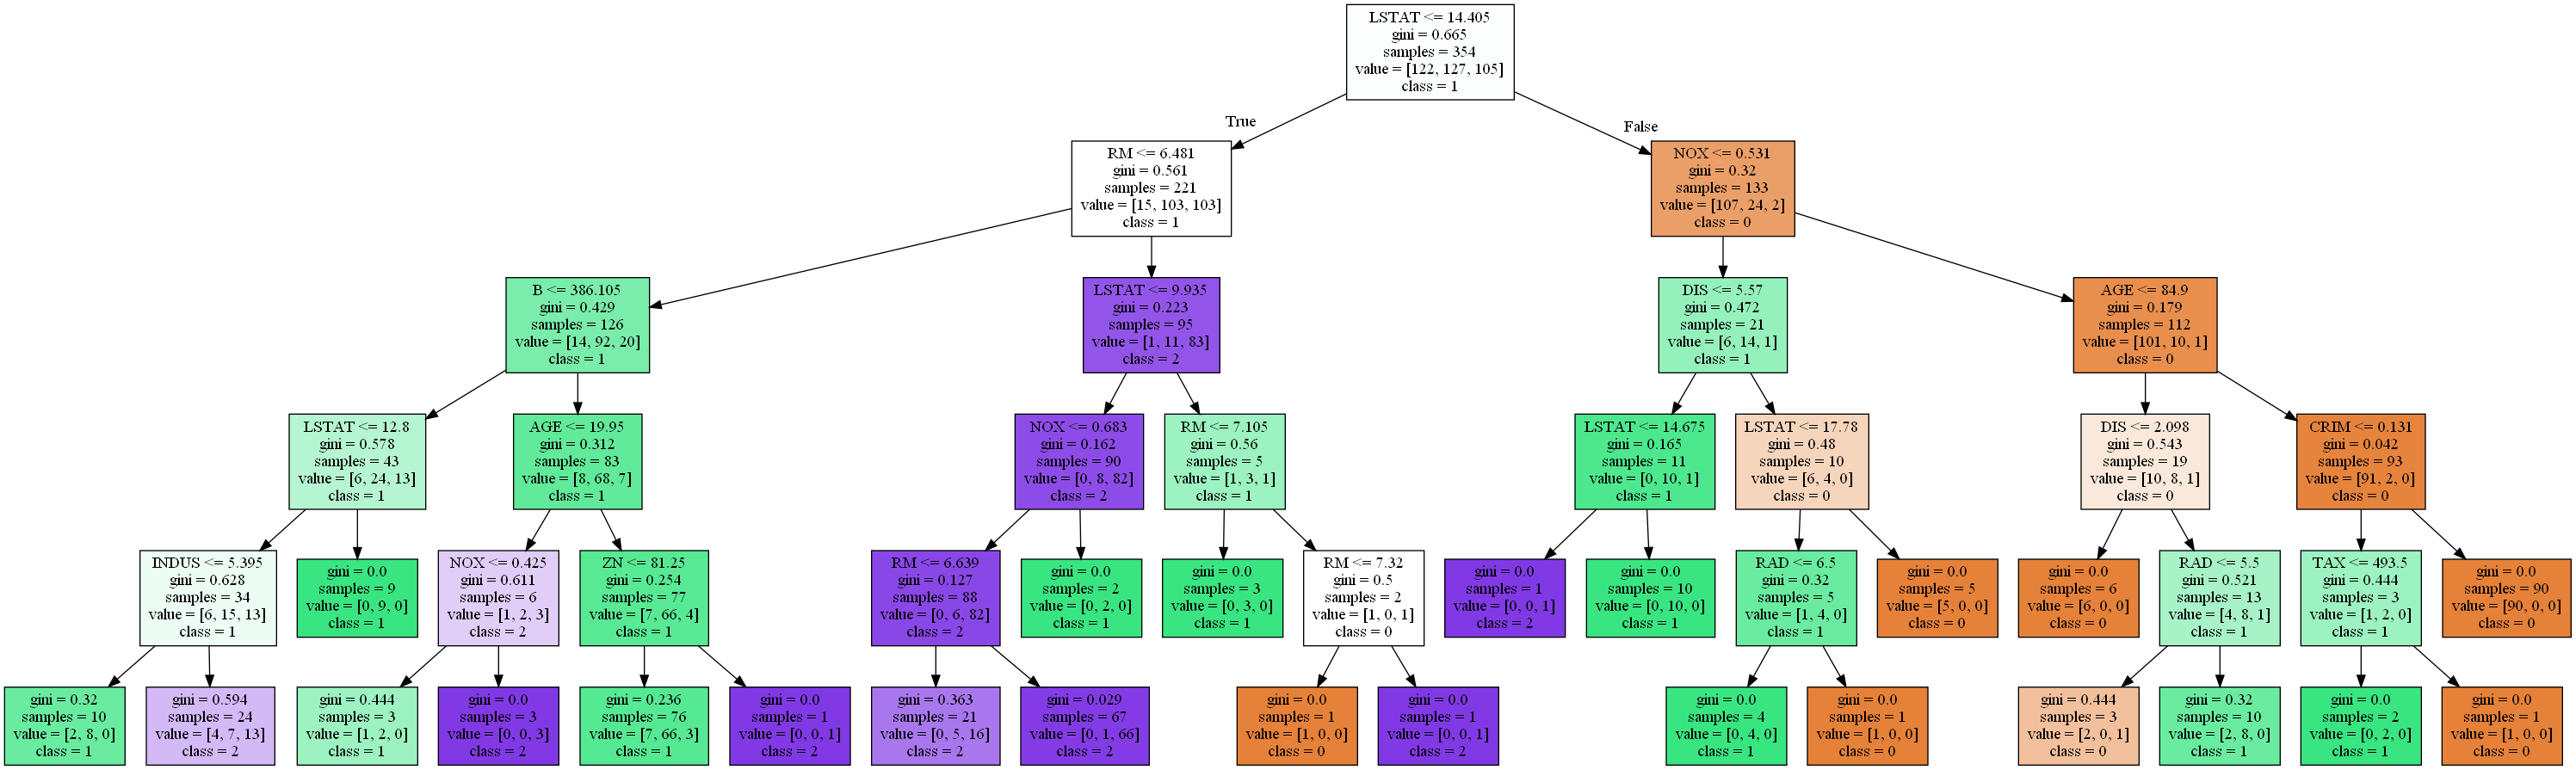

In [15]:

print(f"Depth of the highest test score is {highest_test_score}")
clf = DecisionTreeClassifier(random_state=1,max_depth=highest_test_score)
clf = clf.fit(X_train,Y_train)
#Y_predicted = clf.predict(X_test)

from sklearn import tree
import graphviz

data_for_graph = tree.export_graphviz(clf, filled= True, 
                                feature_names=data.feature_names,  
                                class_names=["0","1","2"])
visual = graphviz.Source(data_for_graph) 
visual.format = "png"
visual.render("decision_tree_1")
from IPython.display import Image 
Image("decision_tree_1.png")